# CMSC641 Final Project - Jingning Mao

The 2008 financial crisis began in December 2007 and ended in June 2009. This project downloads Employment and retails data from the following web sites, wrangling and analyzing data, try to find useful features that can predict market trend.

## Part 1:	Find employment payroll trend and check the period around 2008 crisis changes.
### Data:
    a.  https://www.census.gov/data/datasets/2015/econ/susb/2015-susb.html  
    b.	https://www.census.gov/topics/employment/labor-force/data/tables.html 
    c.  Import Data Files into SQL Server DB:
        -	us_state_totals_2007-2015.xlsx
        -	us_state_totals_1988-2006.xlsx
    d.  Consolidate data:
        -   The 2 above data files are in different data format. Complete the following steps to consolidate the data:
            -   Remove nulls
            -   Fill in blank values 
            -   change value in [ENTERPRISE EMPLOYMENT SIZE] field and make the data value consistent
            -   Pivot and unpivot year 1994 - 2006 data table
            -   consolidate year 1994 - 2006 and year 2007-2015 data into the same format and save them into employment table
    e.	Plot pay rate by States and mark the highest pay State
    f.	Plot Avg. total Annual Payroll/employee in US by year
    g.	Plot the total number of firms by year    
### Data Definition: 
    a.	http://www.census.gov/programs-surveys/susb/about/glossary.html 
    b.	http://www.census.gov/econ/susb/methodology.html 

In [23]:
%matplotlib inline
import seaborn as sns
import pyodbc
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from helpers import *

connectionStr = 'DRIVER={SQL Server};SERVER=MAO2015;DATABASE=Employment;UID=rpt_user;PWD=itrpt1!'

### Get data from Employment data that is saved in database

In [24]:
cnxn = pyodbc.connect(connectionStr)

employmentdata_sql = "SELECT * FROM Employment ORDER BY 1, 2, 4"

empData = pd.read_sql(employmentdata_sql, cnxn)

cnxn.close()

#Calcualte Avg. Employee Annual Payrall
empData['Annual Payroll/Employee'] = empData['ANNUAL PAYROLL ($1,000)'] * 1000 / empData['EMPLOYMENT']

empData.head()

Rpt_Year  FIPS CODE GEOGRAPHIC AREA DESCRIPTION ENTERPRISE EMPLOYMENT SIZE  \
0      1988          0               United States                  1:  Total   
1      1988          0               United States                    2:  0-4   
2      1988          0               United States                    3:  5-9   
3      1988          0               United States                  4:  10-19   
4      1988          0               United States                  6:  20-99   

   NUMBER OF FIRMS  NUMBER OF ESTABLISHMENTS  EMPLOYMENT  \
0          4954645                   6016367  87844303.0   
1          2979905                   2989964   5006203.0   
2           923580                    943442   6060724.0   
3           540988                    583301   7252715.0   
4           430640                    581622  16833702.0   

   ANNUAL PAYROLL ($1,000)  ESTIMATED RECEIPTS ($1,000)  \
0             1.858652e+09                          NaN   
1             1.088009e+08                          NaN   
2             1.030411e+08                          NaN   
3             1.303265e+08                          NaN   
4             3.157512e+08                          NaN   

   Annual Payroll/Employee  
0             21158.482491  
1             21733.215972  
2             17001.451642  
3             17969.334656  
4             18757.086290

### Slice Employment data and prepare data for analyzing
####       1. totalEmp: get totals for United States only
####       2. totalEmp: get totals for each State and add mean of annual payroll per employee cross States

In [25]:
# get totals for United States only
totalEmp = empData.loc[(empData['ENTERPRISE EMPLOYMENT SIZE'] == '1:  Total') & 
                      (empData['GEOGRAPHIC AREA DESCRIPTION'] == 'United States')]

In [26]:
#get totals for each states
totalData = empData.loc[(empData['ENTERPRISE EMPLOYMENT SIZE'] == '1:  Total') & 
                      (empData['GEOGRAPHIC AREA DESCRIPTION'] != 'United States')]

In [27]:
#add mean of annual payroll per employee
totalData['Mean Annual Payroll/Employee'] = totalData.groupby(['Rpt_Year'])['Annual Payroll/Employee'].transform('mean')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
#totalData.reset_index()

totalData.head()

Rpt_Year  FIPS CODE GEOGRAPHIC AREA DESCRIPTION  \
7       1988          1                     Alabama   
14      1988          2                      Alaska   
21      1988          4                     Arizona   
28      1988          5                    Arkansas   
35      1988          6                  California   

   ENTERPRISE EMPLOYMENT SIZE  NUMBER OF FIRMS  NUMBER OF ESTABLISHMENTS  \
7                   1:  Total            70245                     84763   
14                  1:  Total            12229                     14108   
21                  1:  Total            70887                     85400   
28                  1:  Total            44958                     52096   
35                  1:  Total           604939                    716796   

    EMPLOYMENT  ANNUAL PAYROLL ($1,000)  ESTIMATED RECEIPTS ($1,000)  \
7    1220918.0               21997889.0                          NaN   
14    134276.0                3649506.0                          NaN   
21   1174785.0               22332829.0                          NaN   
28    690803.0               11280180.0                          NaN   
35  10430384.0              244136403.0                          NaN   

    Annual Payroll/Employee  Mean Annual Payroll/Employee  
7              18017.499128                   19777.99076  
14             27179.138491                   19777.99076  
21             19010.141430                   19777.99076  
28             16329.083690                   19777.99076  
35             23406.271811                   19777.99076

### Check all employment data relationship by using Seaborn pairplot

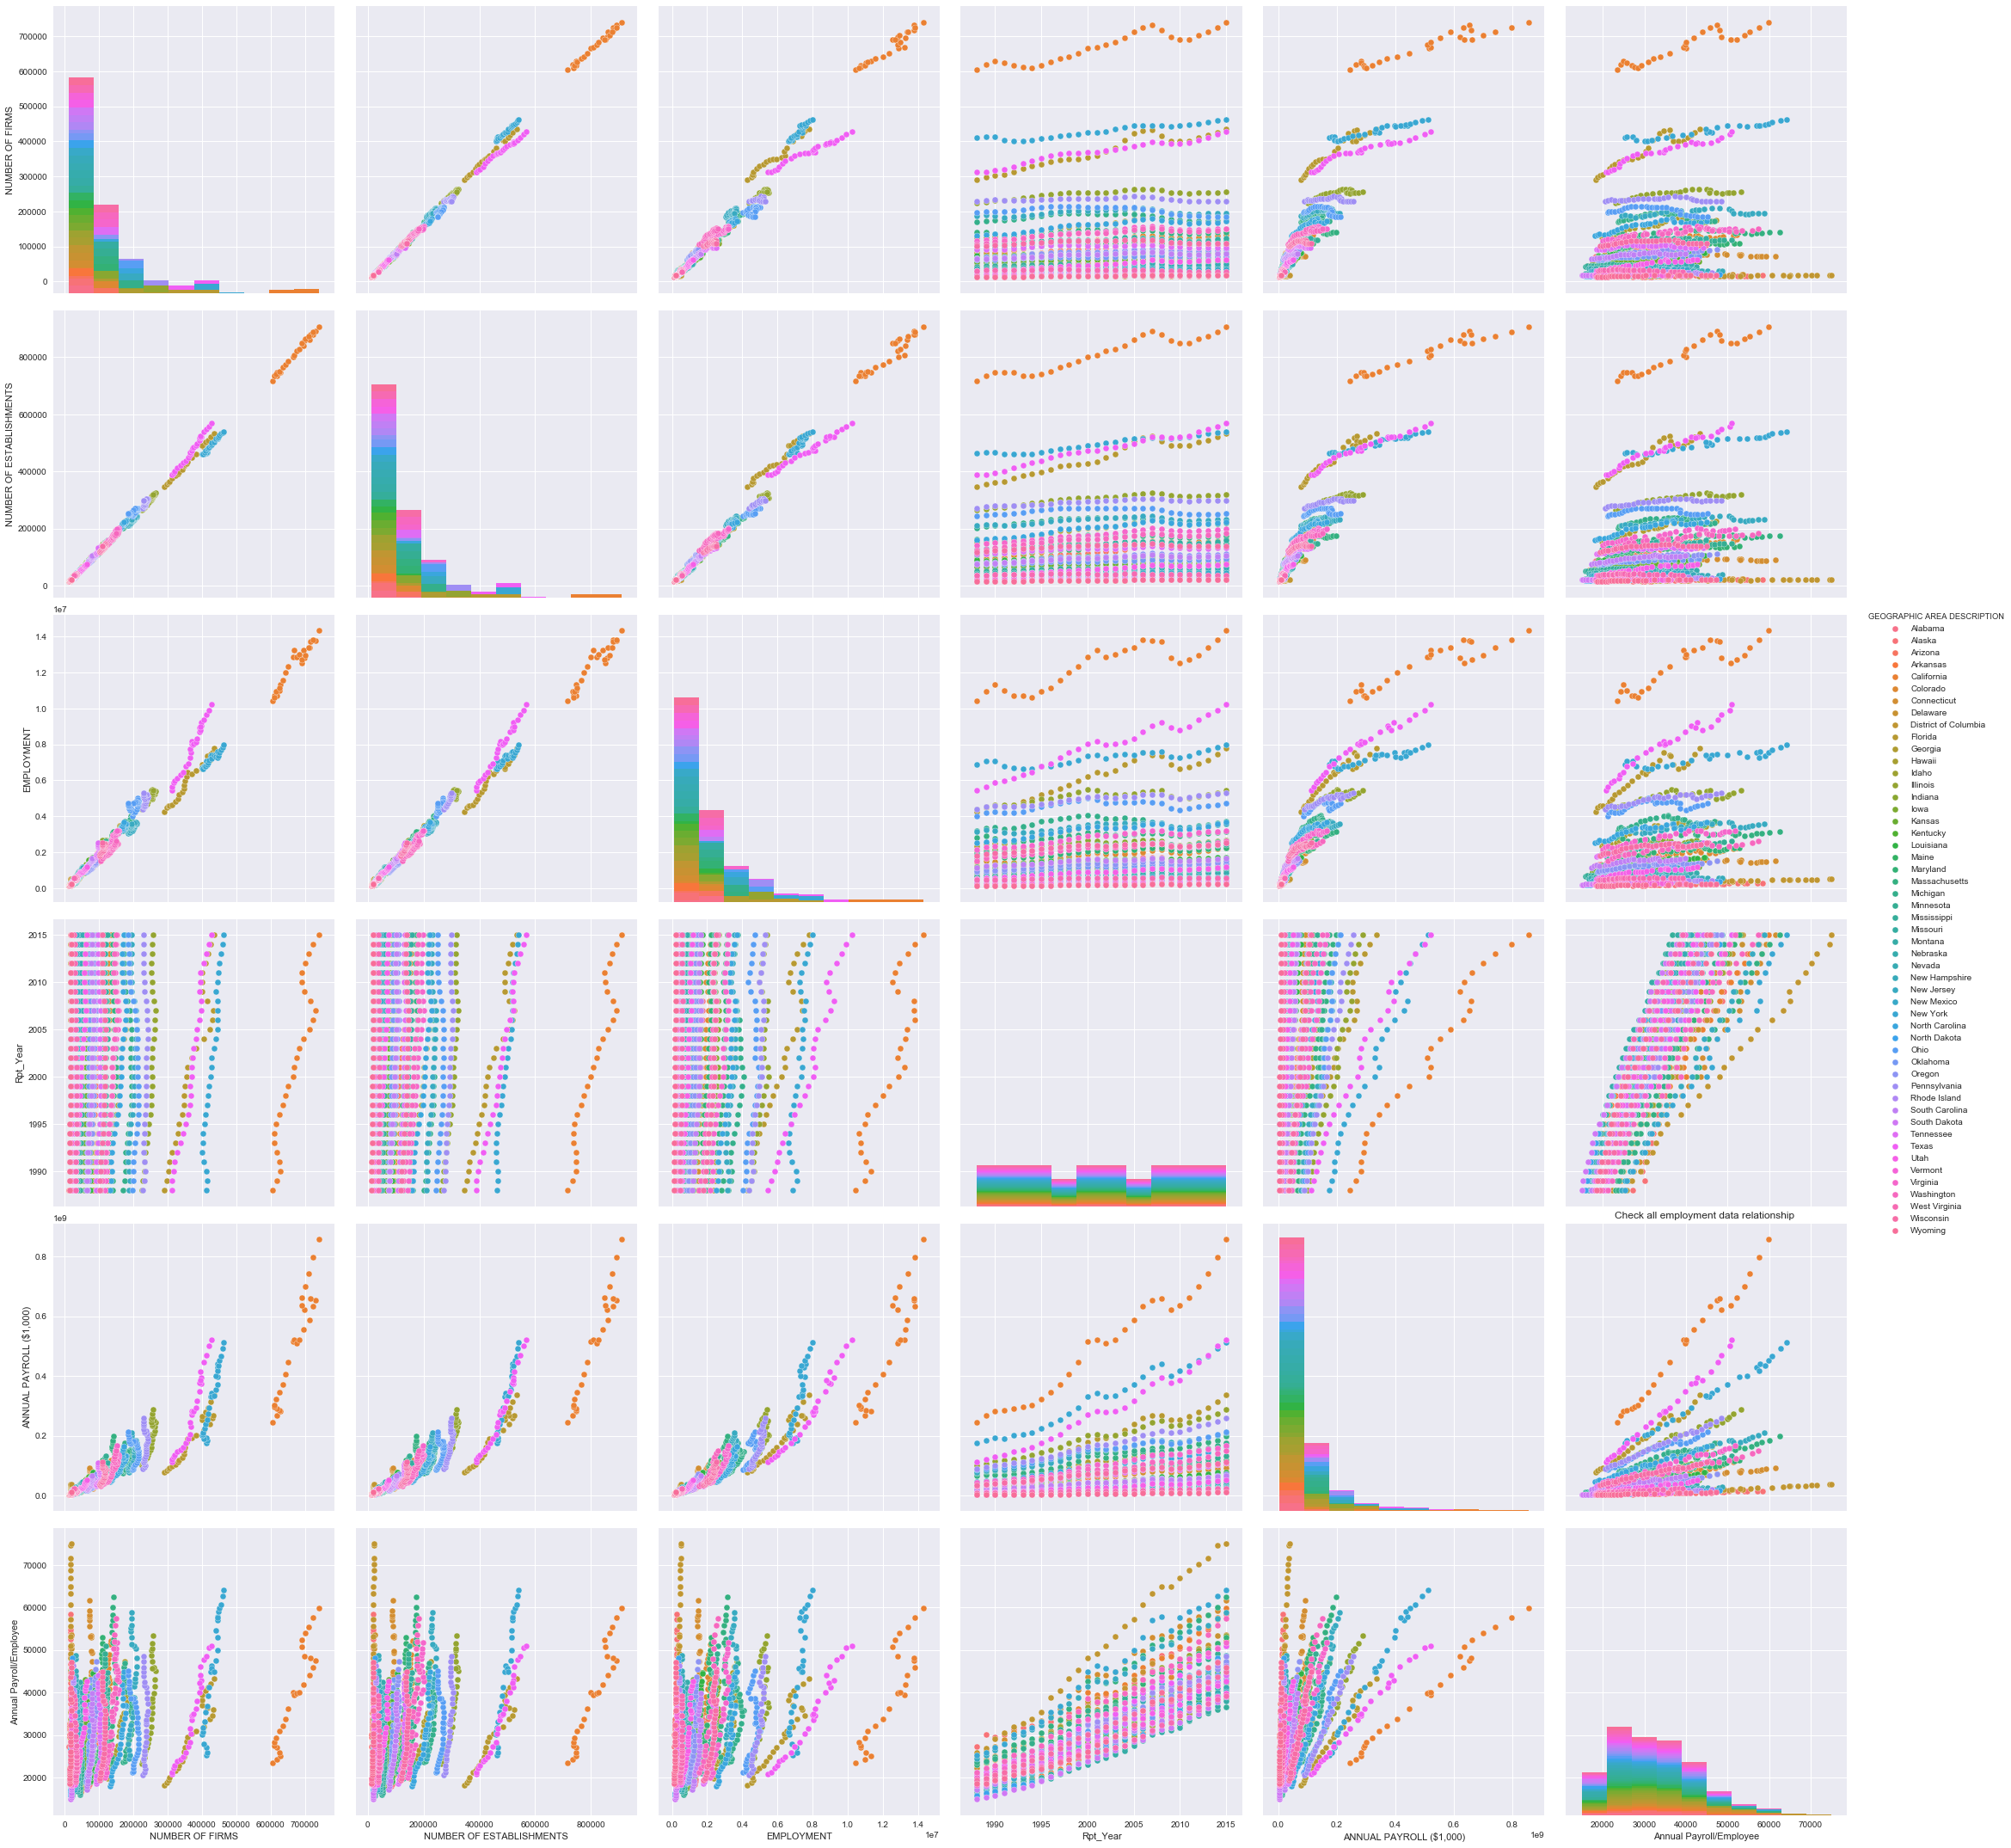

In [29]:
df=totalData[["GEOGRAPHIC AREA DESCRIPTION","NUMBER OF FIRMS",
              "NUMBER OF ESTABLISHMENTS","EMPLOYMENT", "Rpt_Year",
              "ANNUAL PAYROLL ($1,000)","Annual Payroll/Employee"]]
ShowPairplot(data=df, hue="GEOGRAPHIC AREA DESCRIPTION", title="Check all employment data relationship ", size=5)

### Show Means of Annual Payroll per Employee

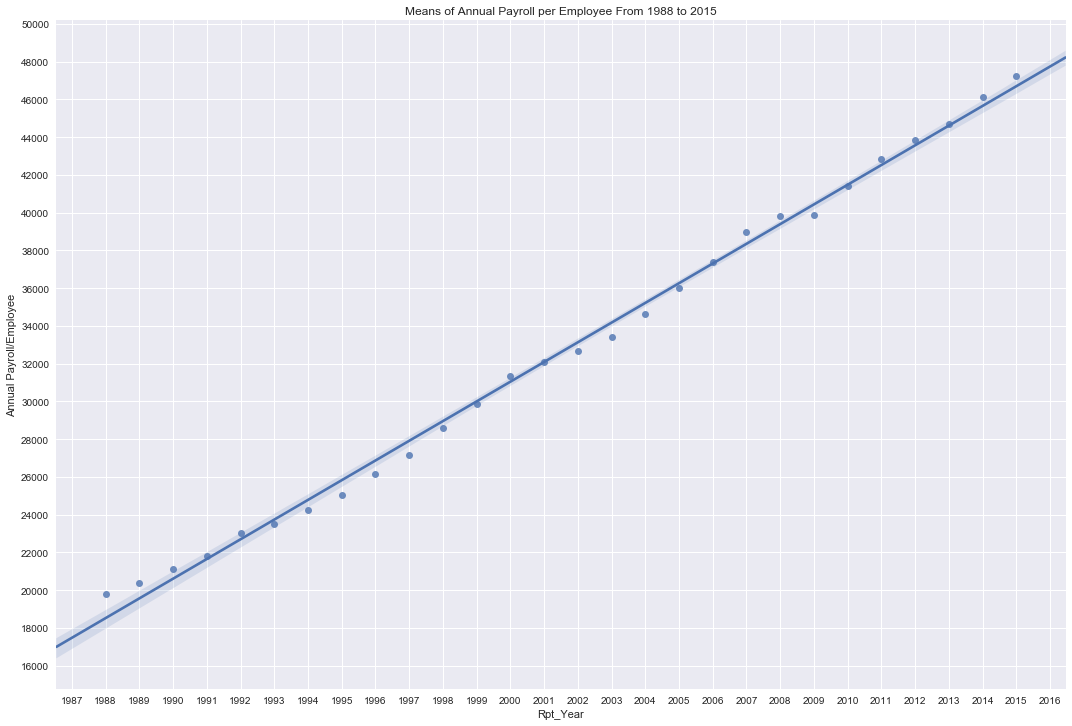

In [30]:
means = totalData.groupby('Rpt_Year')['Annual Payroll/Employee'].mean()
means= means.reset_index()

g= sns.lmplot(x='Rpt_Year', y='Annual Payroll/Employee', data=means, size=10, aspect=1.5)
plt.locator_params(nbins=30)
plt.title('Means of Annual Payroll per Employee From 1988 to 2015')

### Show Annual Payroll per employee cross States Per Year Per Chart by Using Seaborn Plot

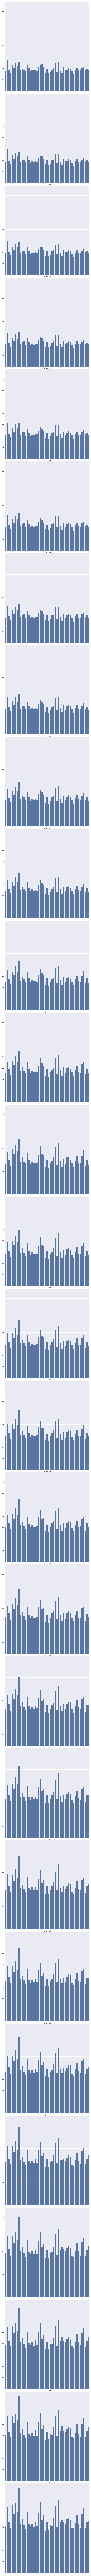

In [31]:
g = sns.FacetGrid(totalData, row="Rpt_Year", size=15)
        
g.map(sns.barplot, "GEOGRAPHIC AREA DESCRIPTION", "Annual Payroll/Employee");

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)

In [32]:
df = totalData.loc[(totalData['Rpt_Year'] == 2000)]
areaData = df.loc[:,["GEOGRAPHIC AREA DESCRIPTION", "Annual Payroll/Employee"]]
areaData.head()

GEOGRAPHIC AREA DESCRIPTION  Annual Payroll/Employee
4375                     Alabama             26591.559724
4382                      Alaska             37336.424468
4389                     Arizona             30341.359302
4396                    Arkansas             24891.590888
4403                  California             39920.277334

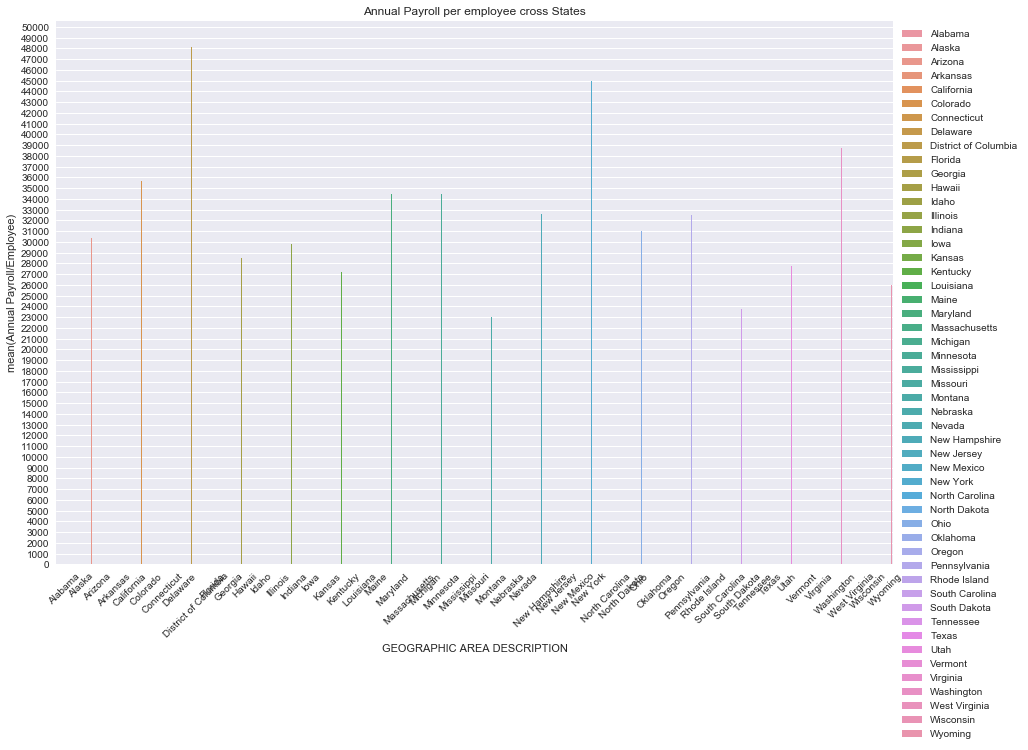

In [33]:
ShowBarPlot(data=areaData, x="GEOGRAPHIC AREA DESCRIPTION", y="Annual Payroll/Employee", 
            hue="GEOGRAPHIC AREA DESCRIPTION",bins=60, 
            title='Annual Payroll per employee cross States',rotation=45,figsize_x=15, figsize_y=10)

In [34]:
ShowLmplotByRow(data=totalData,x="FIPS CODE", y="Annual Payroll/Employee", hue="FIPS CODE", 
                row="Rpt_Year", bins=40, size=10,
                title='Annual Payroll Per Employee By State(per Report Year per Chart)')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Show Annual Payroll per Employee cross States In One Chart by Using Seaborn Plot

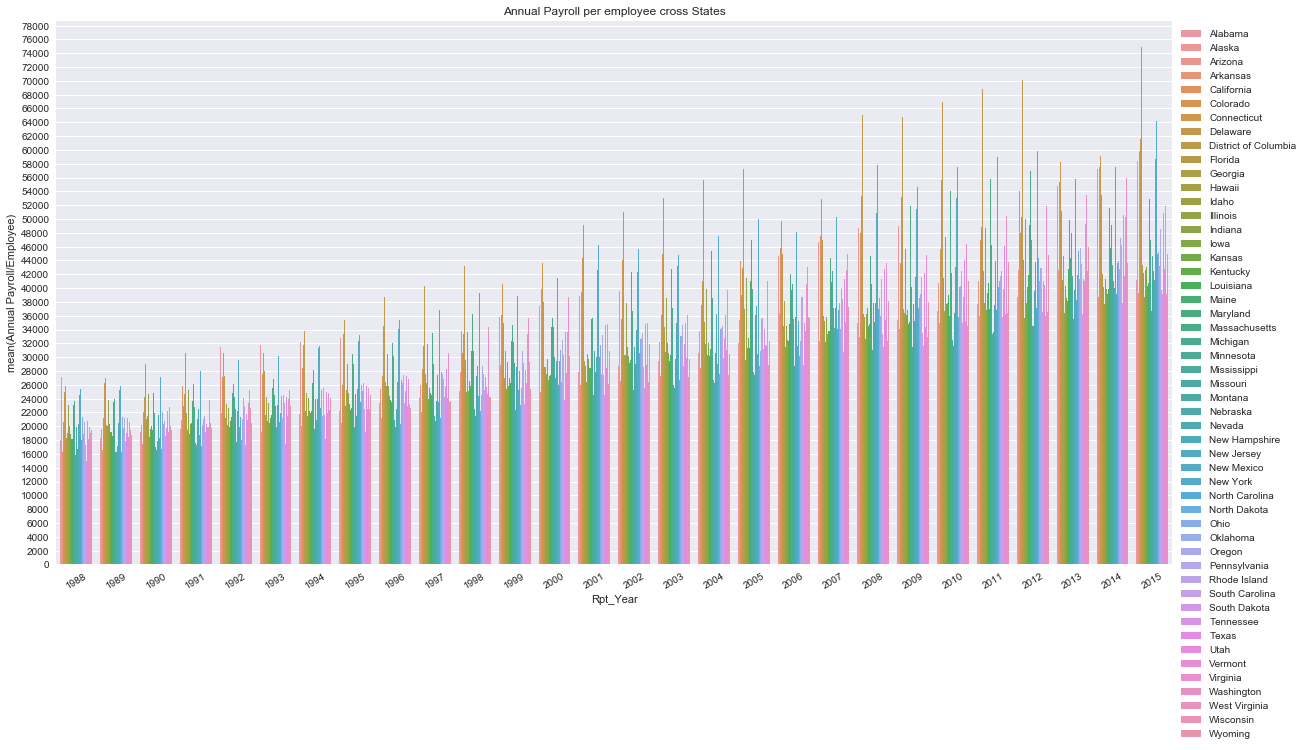

In [35]:
ShowBarPlot(data=totalData, x="Rpt_Year", y="Annual Payroll/Employee", hue="GEOGRAPHIC AREA DESCRIPTION",
            bins=50, title='Annual Payroll per employee cross States',
            rotation=30,figsize_x=20, figsize_y=10)

### Show Total Number of Firms By Year (per State per Chart) by Using Seaborn Plot

In [36]:
ShowLmplotByRow(data=totalData, x="Rpt_Year", y="NUMBER OF FIRMS", hue="ENTERPRISE EMPLOYMENT SIZE", 
                row="GEOGRAPHIC AREA DESCRIPTION", bins=30, size=15,
                title='Total Number of Firms By Year (per State per Chart)')

In [37]:
ShowLmplotByRow(data=empData, x="Rpt_Year", y="NUMBER OF FIRMS", hue="ENTERPRISE EMPLOYMENT SIZE", 
                row="GEOGRAPHIC AREA DESCRIPTION", bins=30, size=15,
                title='All Number Of Firms Annual Payroll / Employee By Year (per State per Chart)')

### Show Annual Payroll Per Employee By Year (per State per Chart) by Using Seaborn Plot

In [38]:
ShowLmplotByRow(data=totalData, x="Rpt_Year", y="Annual Payroll/Employee", hue="ENTERPRISE EMPLOYMENT SIZE", 
                row="GEOGRAPHIC AREA DESCRIPTION", bins=30, size=15,
                title='Annual Payroll Per Employee By Year (per State per Chart)')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Show Total Employment By Year (per State per Chart) by Using Seaborn Plot

In [39]:
ShowLmplotByRow(data=totalData, x="Rpt_Year", y="EMPLOYMENT", hue="ENTERPRISE EMPLOYMENT SIZE", 
                row="GEOGRAPHIC AREA DESCRIPTION", bins=30, size=15,
                title='Total Employee By Year (per State per Chart)')

### Show Annual Payroll per Employee for all Enterprise Employment Size By Year (per State per Chart) by Using Seaborn Plot

In [40]:
ShowLmplotByRow(data=empData, x="Rpt_Year", y="Annual Payroll/Employee", hue="ENTERPRISE EMPLOYMENT SIZE", 
                row="GEOGRAPHIC AREA DESCRIPTION", bins=30, size=15,
                title='Annual Payroll per Employee for all Enterprise Employment Size By Year (per State per Chart)')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Show United States Totol Employment By Year by Using Seaborn Plot

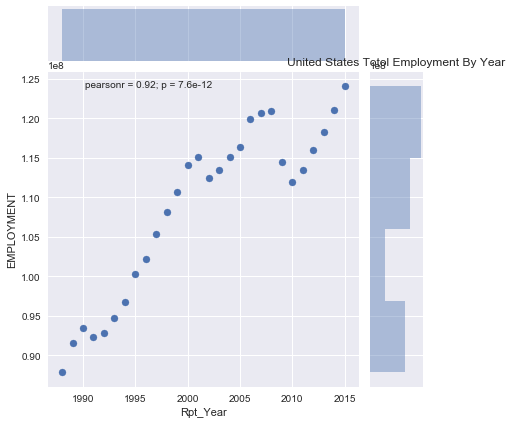

In [41]:
sns.jointplot(x="Rpt_Year", y="EMPLOYMENT", data=totalEmp)

plt.title('United States Totol Employment By Year')

### Show United States Totol Number of Firms By Year by Using Seaborn Plot

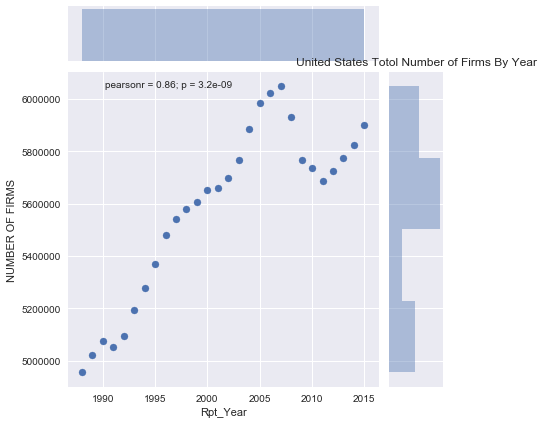

In [42]:
sns.jointplot(x="Rpt_Year", y="NUMBER OF FIRMS", data=totalEmp)

plt.title('United States Totol Number of Firms By Year')

### Show United States Annual Payroll per Employee By Year by Using Seaborn Plot

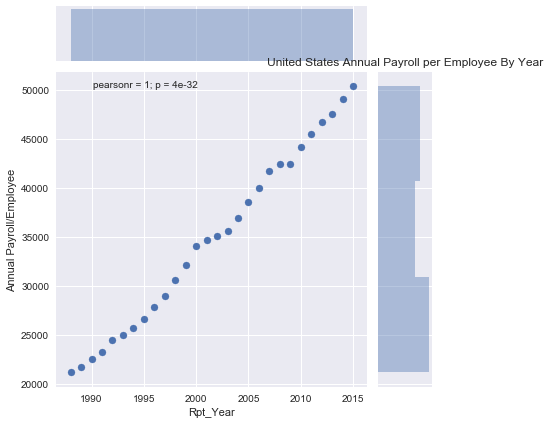

In [43]:
sns.jointplot(x="Rpt_Year", y="Annual Payroll/Employee", data=totalEmp)
plt.title('United States Annual Payroll per Employee By Year')

## ***Part 1: Employment Data Analyzing Conclusion:
    1. Comparing with year 2000 IT bubble and year 2008 financial crisis, the United States lowest total # of firms and employment number are about 2 years behind. 
    2. The United States Avg. annual payrol/employee reflects the year 2000 IT bubble and year 2008 financial crisis right on the time.
    3. Overall, the annual payroll/employee is increased over the years.
        The most increased States are:
            - CT
            - MA
            - NJ
            - CA
            - NY
            - D.C.
            - Delaware
            - VA
            - Washington
    4. The States that the number of firms have been increased over the years are:
        - Texas
        - FL
        - CA (affected by 2000 IT bubble and year 2008 financial crisis)
        - NY
        - Georgia
    5. The States that the number of firms have been decreased over the years are:
        - CT
        - Ohio
    6. The States that the employment have been increased over the years are:
        - Texas
        - FL
        - CA (affected by 2000 IT bubble and year 2008 financial crisis)
        - NY
        - Georgia
        - PA
    7. The most quickly developed States:
        - Texas
        - CA
        - NY
        - PA
    8. The high labor cost States are:
        - CT
        - CA
        - NY
    9. The employment data cannot predict the stock market since it's a lagging economic indicator that it generally rises or falls in the wake of changing economic conditions, rather than anticipating them.
